<a href="https://colab.research.google.com/github/Lamia-lab/GithubIntro/blob/master/Copy_of_segmentation_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!cp -r "drive/MyDrive/Colab Notebooks/work/20230429-segmentation/images" ./

In [ ]:
!cp -r "drive/MyDrive/Colab Notebooks/work/20230429-segmentation/masks" ./

In [ ]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import tensorflow as tf
import multiprocessing as mp

In [ ]:
IMAGE_SIZE = 192
BATCH_SIZE = 8

In [ ]:
def create_binary_mask(mask: np.ndarray):
    """
    load an image where chromosome's border is drawn, create the binary mask
    """

    # get all colors:
    colors = set([])
    h, w, _ = mask.shape

    # Get the border
    binary_mask = np.zeros((h, w), dtype=np.uint8)

    binary_mask[
        (mask[:, :, 0] < 70 ) & (mask[:, :, 1] < 70) & (mask[:, :, 2]> 190)
    ] = 255

    # set the topleft conner to 100, then do flood fill
    filled_value = 100
    cv2.floodFill(binary_mask, None, (0, 0), filled_value)

    binary_mask[binary_mask != filled_value] = 255

    binary_mask[binary_mask == filled_value] = 0

    return binary_mask


def show_training_data(index):
    """ show training data """
    print(TRAINING_DATA[index][-2])
    image = TRAINING_DATA[index][0]
    binary_mask = TRAINING_DATA[index][1]
    print(binary_mask.shape)
    binary_mask = np.repeat(binary_mask, 3, axis=-1)
    
    image = np.concatenate([image, binary_mask], axis=1)
    cv2_imshow(image)

In [ ]:
def worker_(index, folder, name):
    if os.path.exists(os.path.join("masks", folder, name)):
        print(index, end=", ")
        image_path = os.path.join("images", folder, name)
        mask_path = os.path.join("masks", folder, name)

        image = cv2.imread(image_path)
        mask = cv2.imread(mask_path)
        scaled = False
        if image.shape[0] > 224:
            image = cv2.resize(image, (224, 224))
            mask = cv2.resize(mask, (224, 224))
            scaled = True
        
        binary_mask = create_binary_mask(mask)
        if not scaled:
            image = cv2.resize(image, (224, 224))
            mask = cv2.resize(mask, (224, 224))     
            binary_mask = cv2.resize(binary_mask, (224, 224))         

        binary_mask = binary_mask.reshape((224, 224, 1))
        return [image, binary_mask, mask, image_path, mask_path, index]
        

def read_training_data_path():
    """
    This function reads the list of images and masks
    """


    data_pairs = []

    file_list = []
    counter = 0
    for folder in sorted(os.listdir("images")):
        for name in sorted(os.listdir(os.path.join("images", folder))):
            file_list.append([counter, folder, name])
            counter += 1

    with mp.Pool(2) as pool:
        data_pairs = pool.starmap(worker_, file_list)

    return data_pairs

TRAINING_DATA = read_training_data_path()

TRAINING_DATA = sorted(TRAINING_DATA, key=lambda x: x[-1])

0, 34, 351, , 2, 36, 3, 37, 438, , 39, 5, 40, 6, 41, 7, 42, 8, 43, 9, 44, 10, 45, 11, 46, 12, 13, 47, 14, 48, 1549, , 16, 50, 17, 51, 18, 52, 19, 53, 5420, , 55, 21, 56, 22, 57, 23, 58, 24, 59, 25, 60, 26, 61, 27, 62, 28, 63, 29, 64, 30, 65, 31, 66, 32, 67, 33, 68, 102, 69, 103, 70, 104, 71, 105, 72, 106, 73, 107, 74, 108, 75, 109, 76, 77, 110, 78, 111, 79, 80, 112, 81, 113, 114, 82, 83, 115, 84, 116, 85, 117, 86, 118, 87, 119, 88, 120, 89, 121, 90, 122, 91, 123, 92, 124, 93, 125, 94, 126, 95, 127, 96, 128, 97, 129, 98, 130, 99, 131, 100, 132, 101, 133, 136134, , 137, 135, 138, 170, 139, 171, 140, 172, 141, 173, 142, 174, 143, 175, 144, 176, 145, 177, 146, 178, 147, 179, 180, 148, 181, 149, 182, 150, 183, 151, 184, 152, 185, 153, 186, 154, 187, 155, 188, 156, 189, 157, 190, 158, 191, 159, 192, 193, 194, 195, 160, 196, 197, 198, 199, 200, 201, 202, 203, 161, 204, 205, 206, 207, 208, 209, 210, 211, 212, 162, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223163, , 224, 225, 226, 227, 

In [ ]:
len(TRAINING_DATA)
max(TRAINING_DATA, key=lambda x: x[-1])

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

masks/Ch.8/19_BM_00067_12_2_8_1 G.jpg
(224, 224, 1)


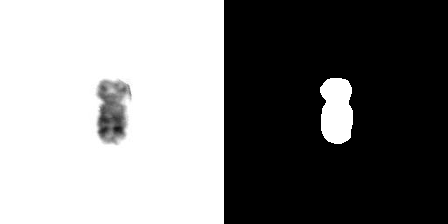

masks/Ch.8/19_BM_00068_21_2_8_1 G.jpg
(224, 224, 1)


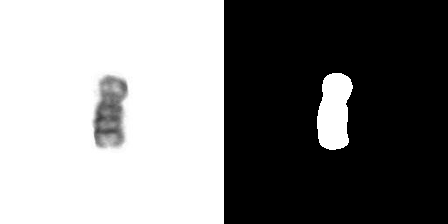

masks/Ch.8/19_BM_00086_04_2_8_1 G.jpg
(224, 224, 1)


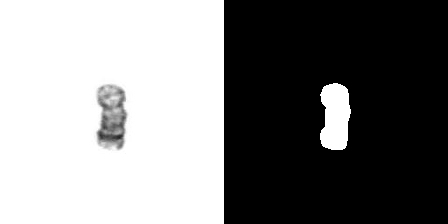

masks/Ch.8/19_BM_00086_08_2_8_1 G.jpg
(224, 224, 1)


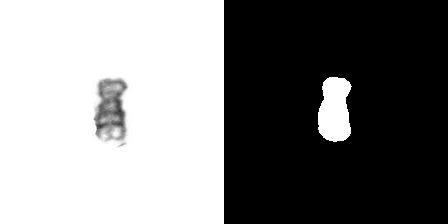

masks/Ch.8/19_BM_00104_21_2_8_2 G.jpg
(224, 224, 1)


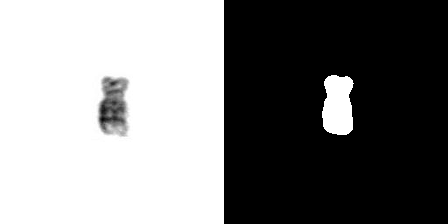

masks/Ch.8/19_BM_00125_15_2_8_1 G.jpg
(224, 224, 1)


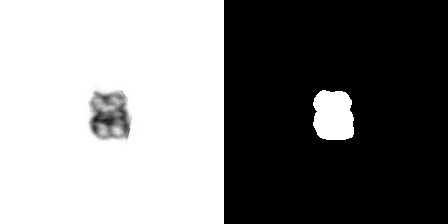

masks/Ch.8/19_BM_00130_19_2_8_2 G.jpg
(224, 224, 1)


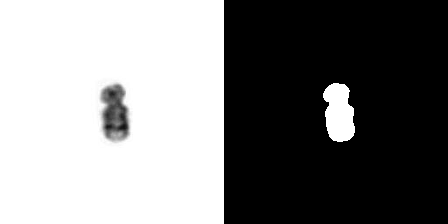

masks/Ch.8/19_BM_00143_17_2_8_1 G.jpg
(224, 224, 1)


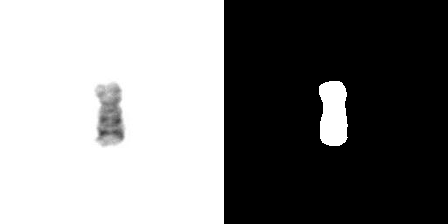

masks/Ch.9/19_BM_00005_28_2_9_2 G.jpg
(224, 224, 1)


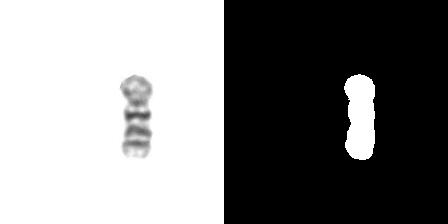

masks/Ch.9/19_BM_00010_04_2_9_1 G.jpg
(224, 224, 1)


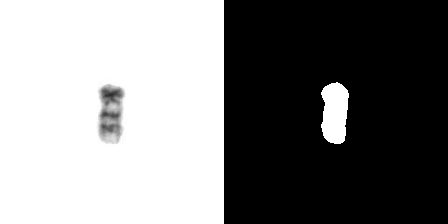

masks/Ch.9/19_BM_00023_13_2_9_2 G.jpg
(224, 224, 1)


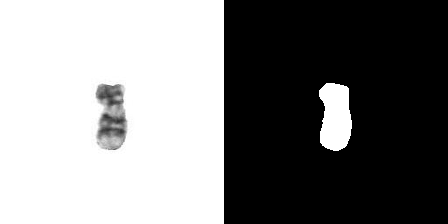

masks/Ch.9/19_BM_00027_22_2_9_2 G.jpg
(224, 224, 1)


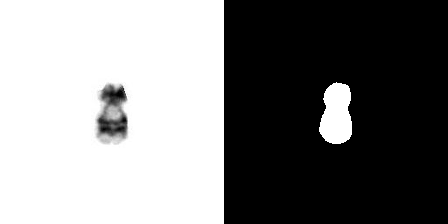

masks/Ch.9/19_BM_00035_09_2_9_2 G.jpg
(224, 224, 1)


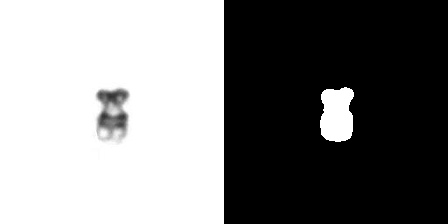

masks/Ch.9/19_BM_00042_09_2_9_1 G.jpg
(224, 224, 1)


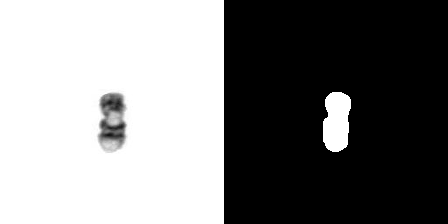

masks/Ch.9/19_BM_00050_04_2_9_1 G.jpg
(224, 224, 1)


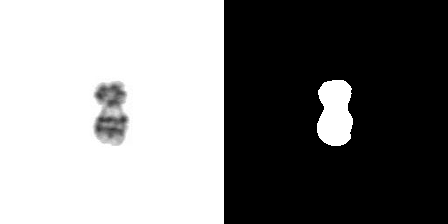

masks/Ch.9/19_BM_00090_03_2_9_1 G.jpg
(224, 224, 1)


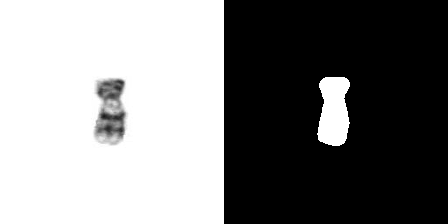

masks/Ch.X/19_BM_00004_01_4_23_2 G.jpg
(224, 224, 1)


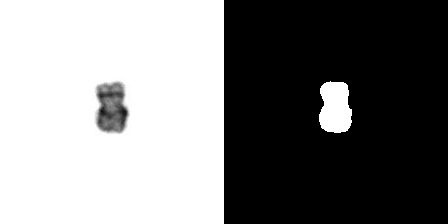

masks/Ch.X/19_BM_00004_17_4_23_2 G.jpg
(224, 224, 1)


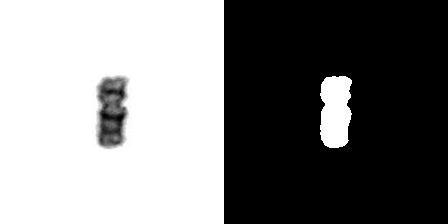

masks/Ch.X/19_BM_00023_01_4_23_2 G.jpg
(224, 224, 1)


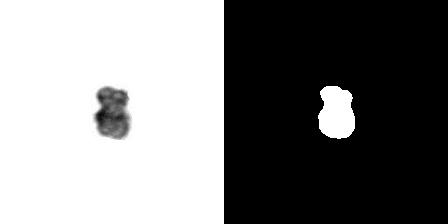

masks/Ch.X/19_BM_00028_20_4_23_2 G.jpg
(224, 224, 1)


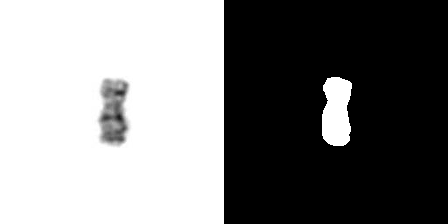

masks/Ch.X/19_BM_00065_05_4_23_1 G.jpg
(224, 224, 1)


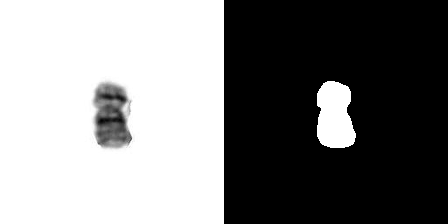

masks/Ch.X/19_BM_00125_14_4_23_1 G.jpg
(224, 224, 1)


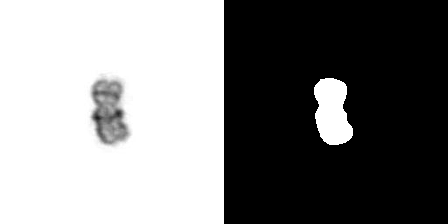

masks/Ch.X/19_BM_00130_09_4_23_2 G.jpg
(224, 224, 1)


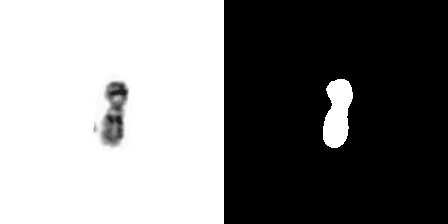

masks/Ch.X/19_BM_00143_08_4_23_1 G.jpg
(224, 224, 1)


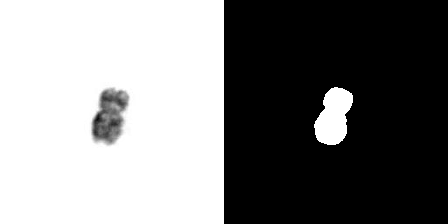

masks/Ch.Y/19_BM_00035_01_4_24_1 G.jpg
(224, 224, 1)


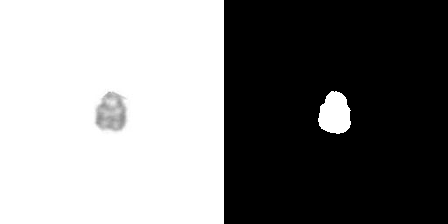

masks/Ch.Y/19_BM_00050_11_4_24_1 G.jpg
(224, 224, 1)


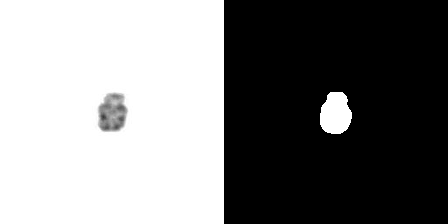

masks/Ch.Y/19_BM_00059_10_4_24_1 G.jpg
(224, 224, 1)


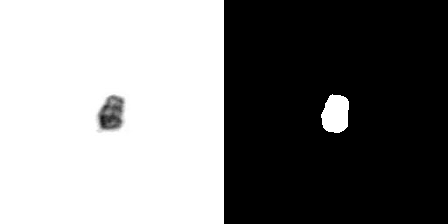

masks/Ch.Y/19_BM_00086_17_4_24_1 G.jpg
(224, 224, 1)


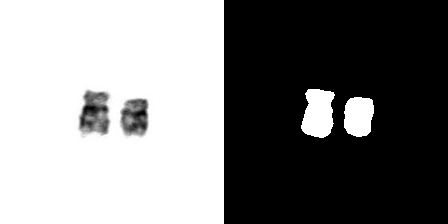

masks/Ch.Y/19_BM_00096_15_4_24_1 G.jpg
(224, 224, 1)


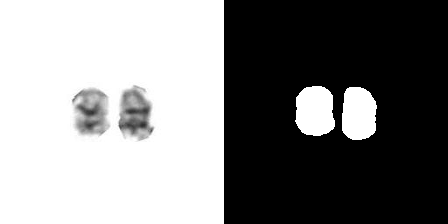

masks/Ch.Y/19_BM_00130_21_4_24_1 G.jpg
(224, 224, 1)


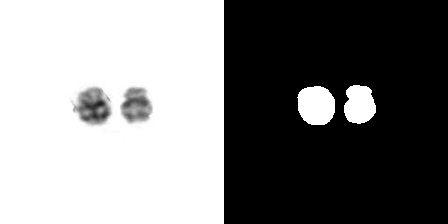

masks/Ch.Y/19_BM_00146_03_4_24_1 G.jpg
(224, 224, 1)


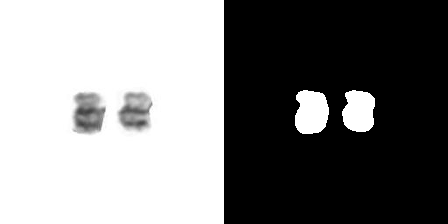

masks/Ch.Y/19_BM_00148_06_4_24_1 G.jpg
(224, 224, 1)


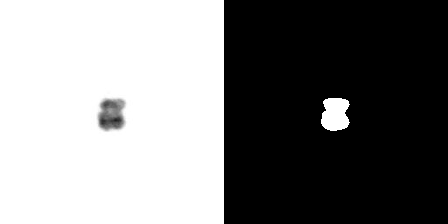

masks/cropped/B016_BL_K006_0.jpg
(224, 224, 1)


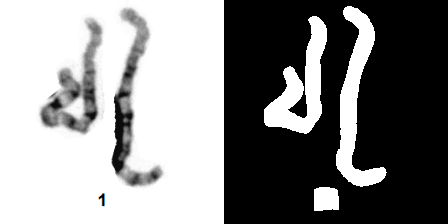

masks/cropped/B016_BL_K006_1.jpg
(224, 224, 1)


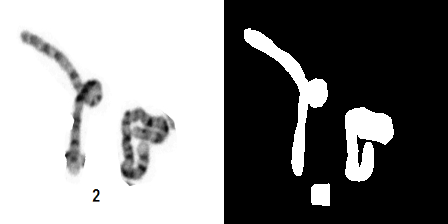

masks/cropped/B016_BL_K006_10a.jpg
(224, 224, 1)


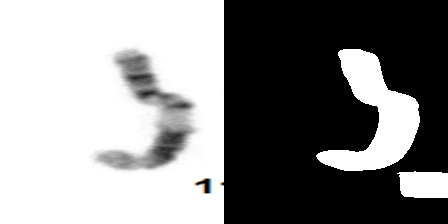

masks/cropped/B016_BL_K006_10b.jpg
(224, 224, 1)


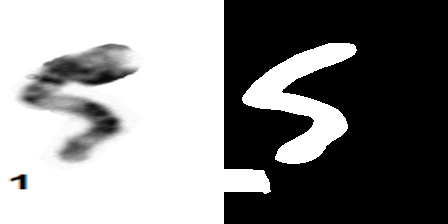

masks/cropped/B016_BL_K006_11a.jpg
(224, 224, 1)


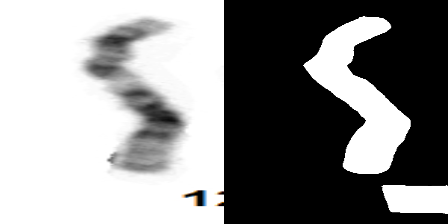

masks/cropped/B016_BL_K006_11b.jpg
(224, 224, 1)


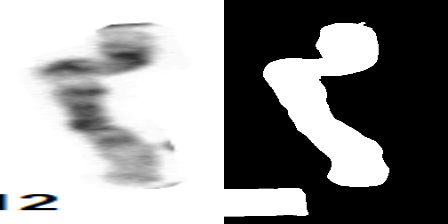

masks/cropped/B016_BL_K006_12a.jpg
(224, 224, 1)


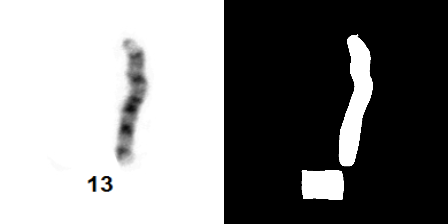

masks/cropped/B016_BL_K006_12b.jpg
(224, 224, 1)


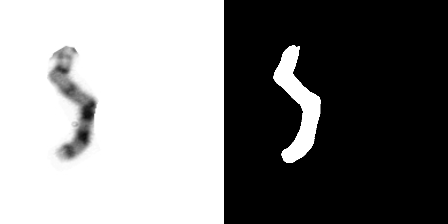

In [ ]:
for i in range(160, 200):
    show_training_data(i)

In [ ]:
# Slit the train and test dataset
indices = np.arange(len(TRAINING_DATA))
np.random.seed(0)

np.random.shuffle(indices)
n_train = int(0.8*len(indices))

train_set = [TRAINING_DATA[i] for i in indices[:n_train]]
test_set = [TRAINING_DATA[i] for i in indices[n_train:]]


In [ ]:
def dice_coef(y_true, y_pred): # accuracy function 
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return (2. * intersection + 1e-6) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + 1e-6)
  
def dice_loss(y_true,y_pred): # loss function 
    return -dice_coef(y_true,y_pred)
  
def log_dice_loss(y_true, y_pred):
    return -tf.math.log(dice_coef(y_true, y_pred))



def iou(y_true, y_pred, threshold=0.5):                                                             
    y_true = tf.reshape(y_true, [-1])                                                               
    y_true = tf.cast(y_true, tf.float32)                                                            
    y_pred = tf.cast(y_pred > threshold, tf.float32)                                                
                                                                                                    
    y_pred = tf.reshape(y_pred, [-1])                                                               
                                                                                                    
                                                                                                    
    intersection = tf.reduce_sum(y_true*y_pred)                                                     
    union = tf.reduce_sum(tf.cast(y_true + y_pred > 0, tf.float32))                                 
                                                                                                    
    return intersection/union 


def double_conv_block(x, n_filters):
    # Conv2D then ReLU activation
    x = tf.keras.layers.Conv2D(
        n_filters,
        3,
        padding="same",
        activation="relu",
        kernel_initializer="he_normal"
    )(x)
    # Conv2D then ReLU activation
    x = tf.keras.layers.Conv2D(
        n_filters,
        3,
        padding="same",
        activation="relu",
        kernel_initializer="he_normal"
    )(x)
    return x

def downsample_block(x, n_filters):
    f = double_conv_block(x, n_filters)
    p = tf.keras.layers.MaxPool2D(2)(f)
    p = tf.keras.layers.Dropout(0.3)(p)
    return f, p

def upsample_block(x, conv_features, n_filters):
    # upsample
    x = tf.keras.layers.Conv2DTranspose(n_filters, 3, 2, padding="same")(x)
    # concatenate
    x = tf.keras.layers.concatenate([x, conv_features])
    # dropout
    x = tf.keras.layers.Dropout(0.3)(x)
    # Conv2D twice with ReLU activation
    x = double_conv_block(x, n_filters)
    return x

def create_unet():
    # inputs
    inputs = tf.keras.layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    # encoder: contracting path - downsample
    # 1 - downsample
    f1, p1 = downsample_block(inputs, 32) # 64
    # 2 - downsample
    f2, p2 = downsample_block(p1, 64) # 128
    # 3 - downsample
    f3, p3 = downsample_block(p2, 128) # 256
    # 4 - downsample
    f4, p4 = downsample_block(p3, 256) # 512
    # 5 - bottleneck
    bottleneck = double_conv_block(p4, 256) # 1024

    # decoder: expanding path - upsample
    # 6 - upsample
    u6 = upsample_block(bottleneck, f4, 256) # 512
    # 7 - upsample
    u7 = upsample_block(u6, f3, 128) # 256
    # 8 - upsample
    u8 = upsample_block(u7, f2, 64) # 128
    # 9 - upsample
    u9 = upsample_block(u8, f1, 32)
    # outputs
    outputs = tf.keras.layers.Conv2D(1, 1, padding="same", activation = "sigmoid")(u9)
    # unet model with Keras Functional API
    unet_model = tf.keras.Model(inputs, outputs, name="U-Net")
    return unet_model



def augmentation_fn(image, mask, training=True):
    """
    Augmentation for training set only. random cropy 50% of the time, random flip 50% of the time
    """
    # change brightness

    image = image.copy()
    mask = mask.copy()
    if training:
        image = tf.image.random_brightness(image, 0.1)
        image = tf.image.random_hue(image, 0.1)
    
        seed = np.random.randint(0, 1000, (2, ))
        if np.random.rand() < 0.5:
            random_size = np.random.randint(160, 224) # this is because the size of the image is 224 
        
            image = tf.image.stateless_random_crop(image, [random_size, random_size, 3], seed=seed)
            mask = tf.image.stateless_random_crop(mask, [random_size, random_size, 1], seed=seed)

        if np.random.rand() < 0.5:
            image = tf.image.stateless_random_flip_up_down(image, seed)
            mask = tf.image.stateless_random_flip_up_down(mask, seed)


    image = tf.image.resize(image, (IMAGE_SIZE, IMAGE_SIZE))/127.5 - 1.0
    mask = tf.cast(tf.image.resize(mask, (IMAGE_SIZE, IMAGE_SIZE)) > 127.5, float)
    
    return image, mask


def data_generator(dataset, batch_size=BATCH_SIZE, training=True):
    n_data = len(dataset)

    i = 0
    while True:
        if i + batch_size > n_data:
            i = 0
            shuffed_mask = np.arange(n_data)
            np.random.shuffle(shuffed_mask)

            dataset = [dataset[j] for j in shuffed_mask]
        
        # mini batch input
        mini_X = [dataset[_][0] for _ in range(i, i + batch_size)]

        # mini batch binary mask
        mini_Y = [dataset[_][1] for _ in range(i, i + batch_size)]

        
        processed_data = [augmentation_fn(x, y, training) for x, y in zip(mini_X, mini_Y)]
        mini_X = [item[0] for item in processed_data]
        mini_Y = [item[1] for item in processed_data]

        mini_X = tf.concat([tf.expand_dims(_, axis=0) for _ in mini_X], axis=0)
        mini_Y = tf.concat([tf.expand_dims(_, axis=0) for _ in mini_Y], axis=0)

        i += batch_size
        yield mini_X, mini_Y

In [ ]:
model = create_unet()

model.summary()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=log_dice_loss,
    metrics=[dice_coef, iou]
)

train_generator = data_generator(train_set, training=True)
validation_generator = data_generator(test_set, training=False)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=30, restore_best_weights=True
)
history = model.fit(
    train_generator,
    epochs=200,
    validation_data=validation_generator,
    steps_per_epoch=len(train_set)//BATCH_SIZE,
    validation_steps=len(test_set)//BATCH_SIZE,
    callbacks=[early_stopping]
)

model.save("/content/drive/MyDrive/Colab Notebooks/work/20230429-segmentation/best_model_2023_05_04.h5")

Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 192, 192, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 192, 192, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 192, 192, 32  9248        ['conv2d[0][0]']                 
                                )                                                             

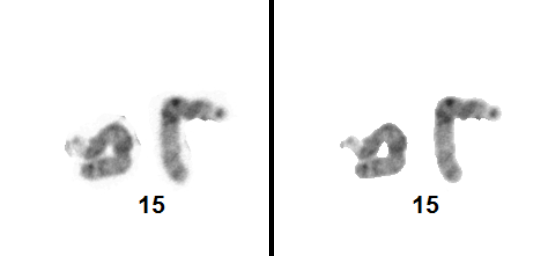

In [ ]:
def segmentation_example(index):

    data_point = test_set[index]


    _, ground_truth, _, image_path, _, _ = data_point

    image = cv2.imread(image_path)
    h, w, _ = image.shape

    image_input = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
    image_input = np.expand_dims(image_input.astype(float)/127.5 - 1.0, axis=0)

    prediction = model.predict(image_input, verbose=0)[0, :, :, 0]
    prediction = cv2.resize(prediction, (w, h))

    cleaned = image.copy()
    cleaned[prediction < 0.5] = 255


    new_height = 256
    new_width = int(new_height/h*w)
    image = cv2.resize(image, (new_width, new_height))
    image[:, -5:] = 0
    cleaned = cv2.resize(cleaned, (new_width, new_height))

    output = np.concatenate([image, cleaned], axis=1)
    cv2_imshow(output)
segmentation_example(0)

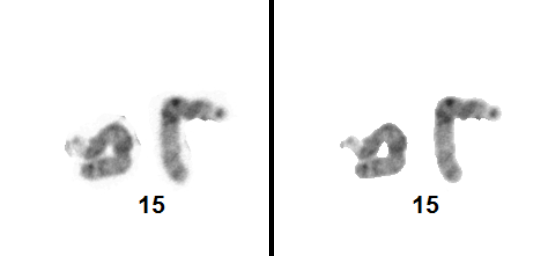

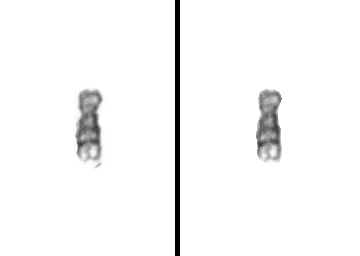

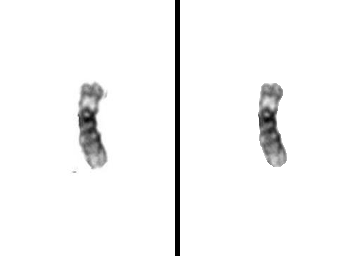

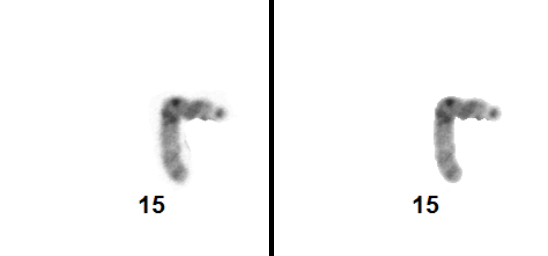

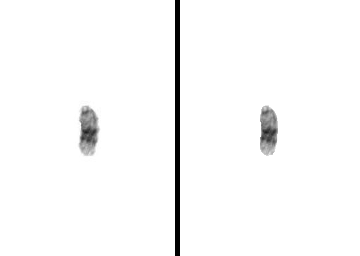

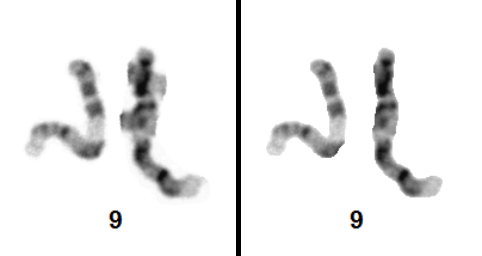

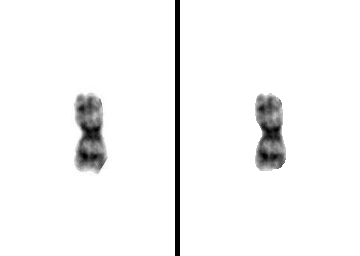

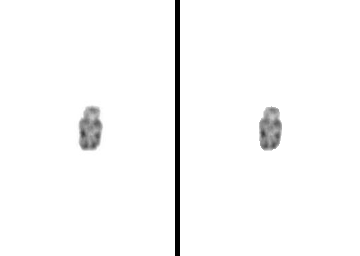

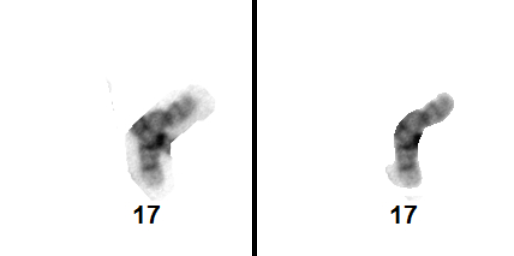

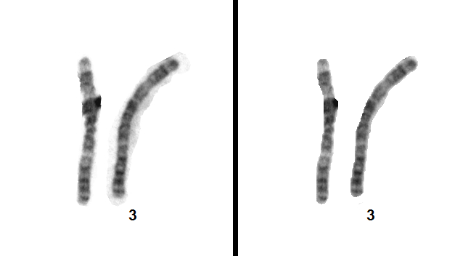

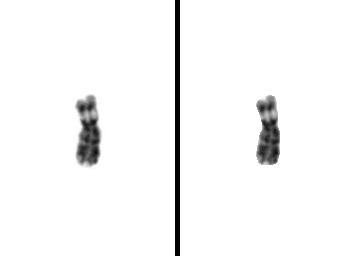

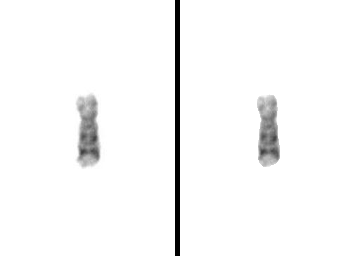

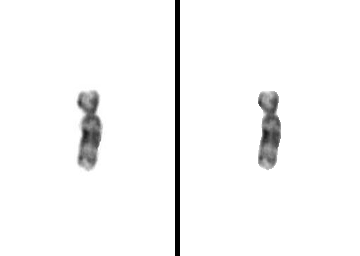

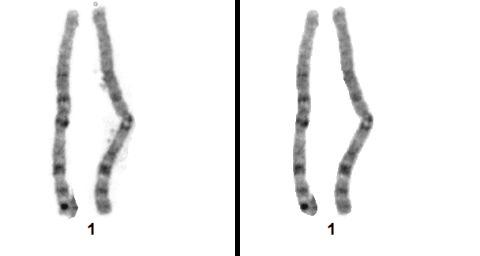

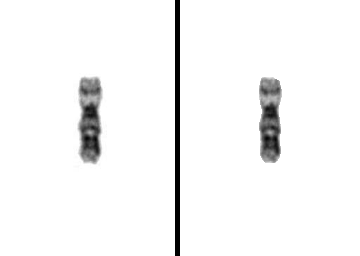

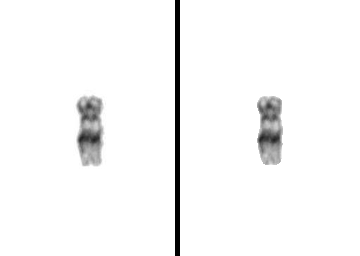

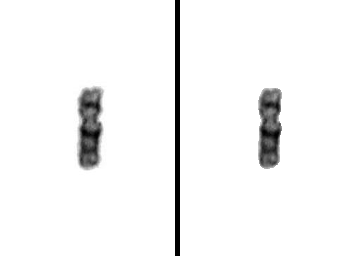

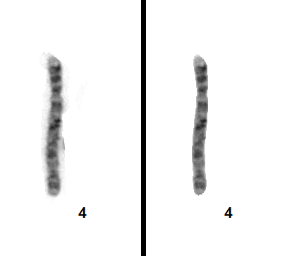

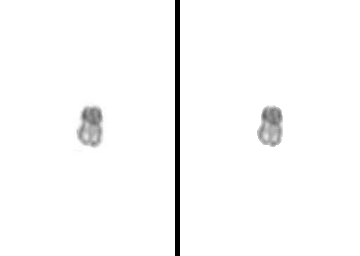

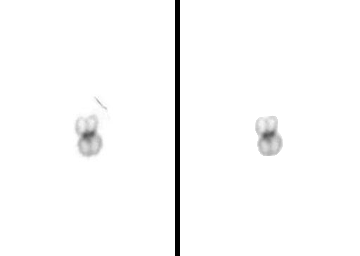

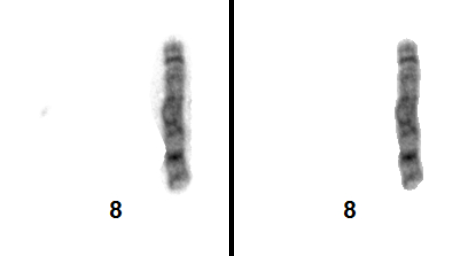

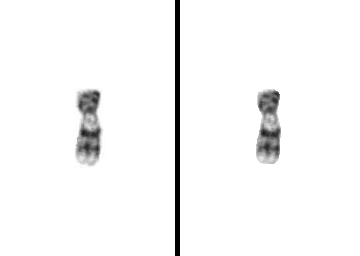

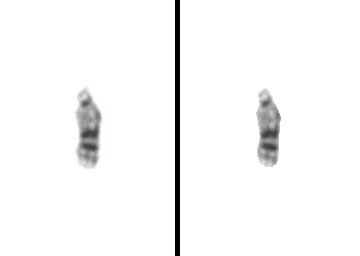

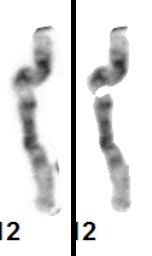

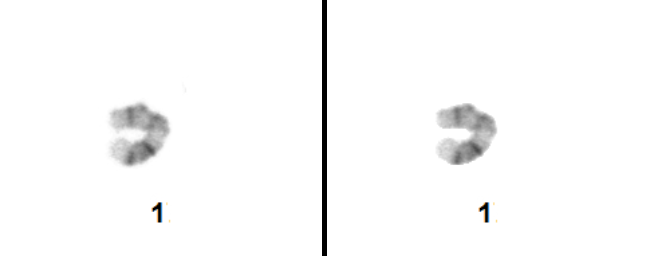

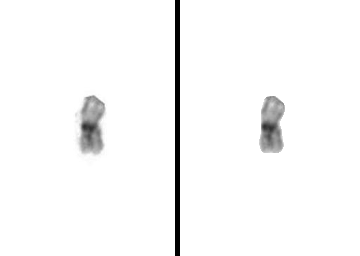

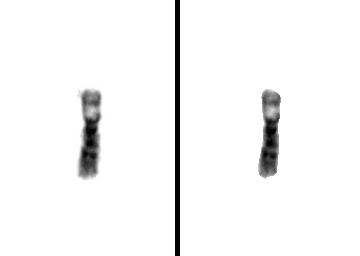

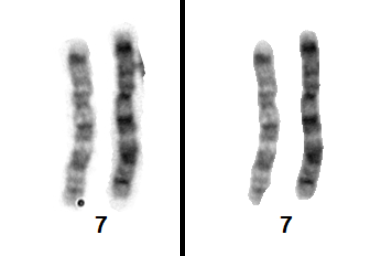

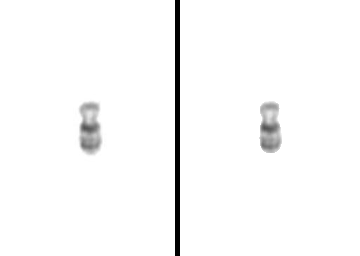

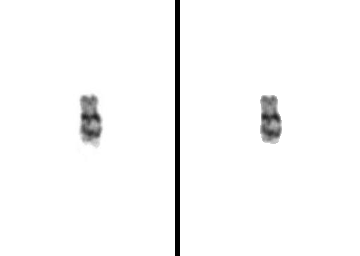

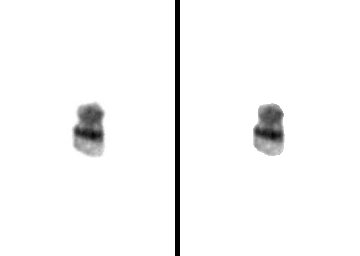

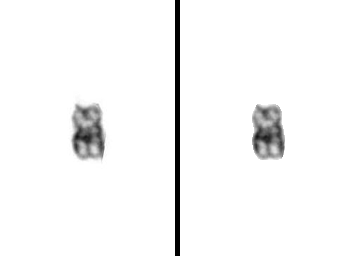

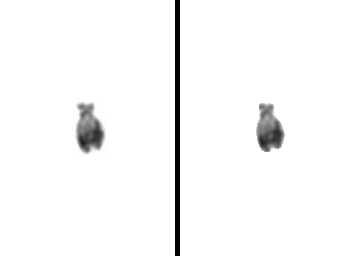

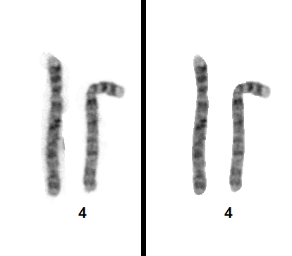

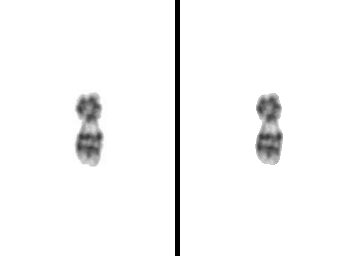

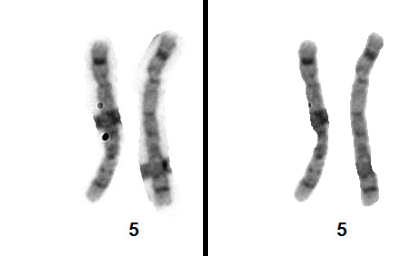

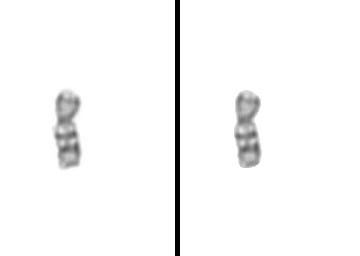

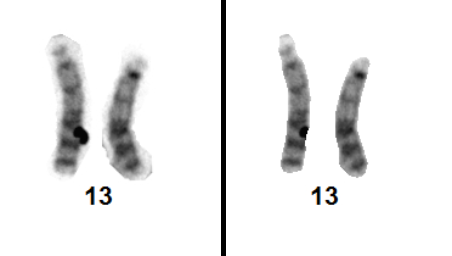

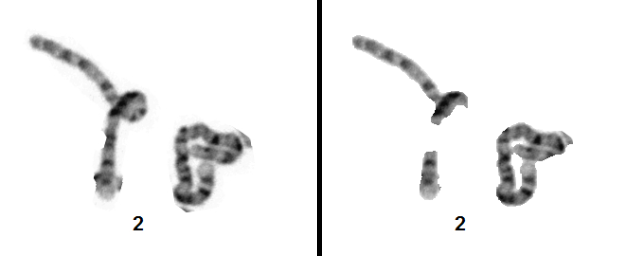

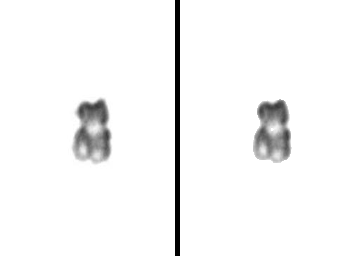

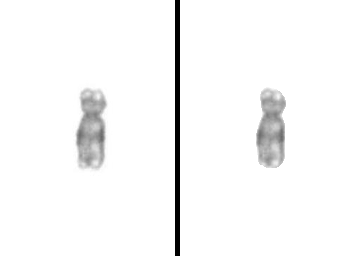

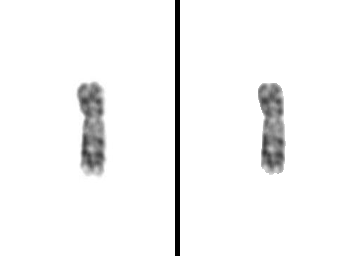

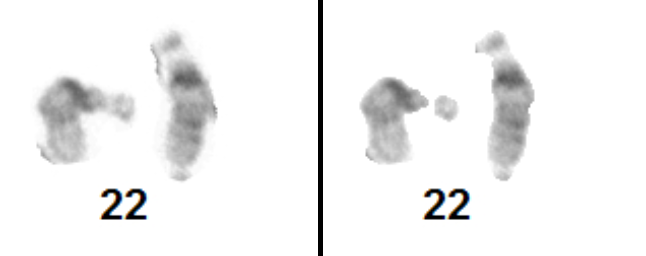

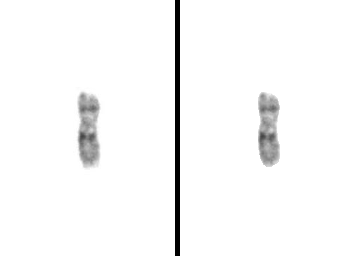

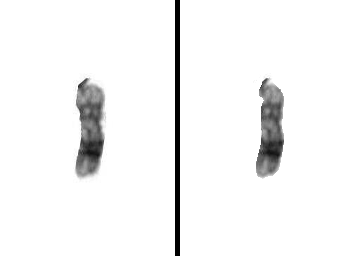

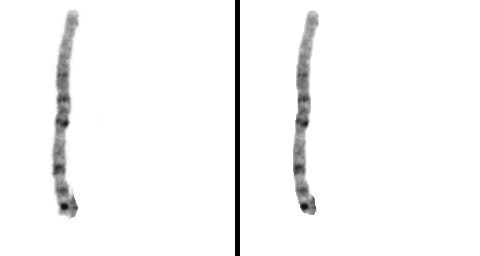

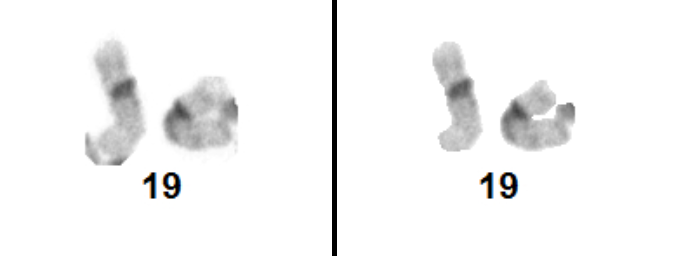

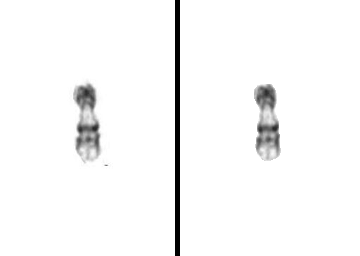

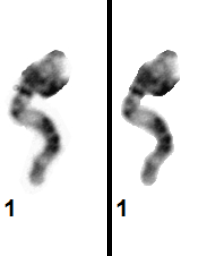

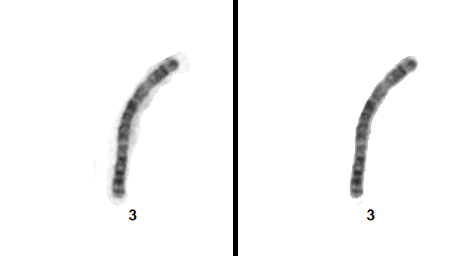

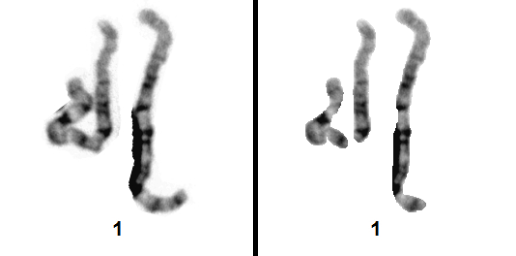

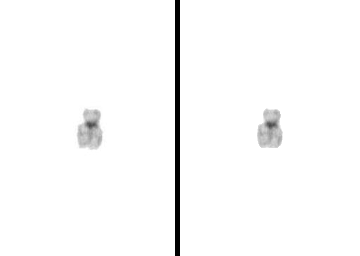

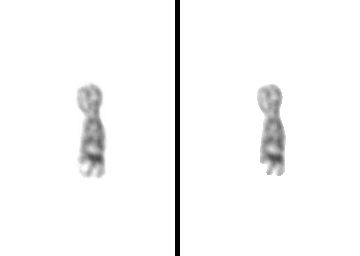

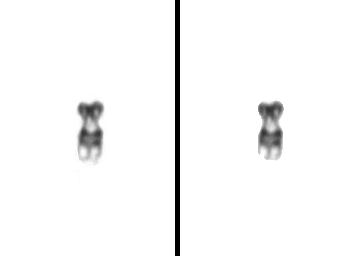

In [ ]:
for i in range(len(test_set)):
    segmentation_example(i)